#📌 Extracción

In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo en Drive (ajusta la ruta a tu carpeta)
path = "/content/drive/MyDrive/TelecomX_Data.json"

# Leer JSON
df = pd.read_json(path)
df.head()


Mounted at /content/drive


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
# Vista general: tipos de datos, nulos, memoria
df.info()

# Vista estadística (incluye categorías y numéricos)
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,count,unique,top,freq
customerID,7267,7267,9995-HOTOH,1
Churn,7267,3,No,5174
customer,7267,891,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...",223
phone,7267,3,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}",3495
internet,7267,129,"{'InternetService': 'No', 'OnlineSecurity': 'N...",1581
account,7267,6931,"{'Contract': 'Month-to-month', 'PaperlessBilli...",6


In [ ]:
 #Conteo de nulos por columna
print(df.isnull().sum())

# Porcentaje de nulos por columna
print((df.isnull().mean() * 100).round(2))

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64
customerID    0.0
Churn         0.0
customer      0.0
phone         0.0
internet      0.0
account       0.0
dtype: float64


In [ ]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [ ]:
#Para expandir esas estructuras en nuevas columnas.
import pandas as pd

# Expandir subcampos de cada columna anidada
customer_df = pd.json_normalize(df["customer"])
phone_df    = pd.json_normalize(df["phone"])
internet_df = pd.json_normalize(df["internet"])
account_df  = pd.json_normalize(df["account"])

# Concatenar todo en un solo DataFrame
df_clean = pd.concat([df["customerID"], df["Churn"],
                      customer_df, phone_df, internet_df, account_df], axis=1)

# Revisar resultado
print(df_clean.info())
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
#columna Churn ya no es de tipo string (posiblemente ya tiene valores NaN, números o algún booleano mezclado).
df_clean["Churn"] = (
    df_clean["Churn"]
    .astype(str)                # forzar a string
    .str.strip()                # quitar espacios
    .str.lower()                # pasar a minúsculas
    .replace({"yes": 1, "no": 0, "nan": pd.NA})  # mapear a 1/0
)


In [ ]:
print(df_clean["Churn"].unique())
print(df_clean["Churn"].value_counts(dropna=False))


[0 1 '']
Churn
0    5174
1    1869
      224
Name: count, dtype: int64


In [ ]:
#Columna binaria numérica lista para análisis y modelado.
print(df_clean["Churn"].unique())
print(df_clean["Churn"].value_counts(dropna=False))
print(df_clean["Churn"].dtype)

[0 1 '']
Churn
0    5174
1    1869
      224
Name: count, dtype: int64
object


#📊 Carga y análisis

In [ ]:
for col in df.columns:
    print(col, df[col].dtype)
    print(df[col].head(3).tolist(), "\n")

customerID object
['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ'] 

Churn object
['No', 'No', 'Yes'] 

customer object
[{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}, {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}] 

phone object
[{'PhoneService': 'Yes', 'MultipleLines': 'No'}, {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}, {'PhoneService': 'Yes', 'MultipleLines': 'No'}] 

internet object
[{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}, {'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProte

In [ ]:
# Expandir los diccionarios
customer_df = pd.json_normalize(df["customer"])
phone_df    = pd.json_normalize(df["phone"])
internet_df = pd.json_normalize(df["internet"])
account_df  = pd.json_normalize(df["account"])

# Extraer las subclaves dentro de Charges
charges_df  = pd.json_normalize(df["account"].apply(lambda x: x.get("Charges", {})))

# Si Charges ya se expandió en account_df, quitamos esas columnas duplicadas
cols_to_keep = [c for c in account_df.columns if not c.startswith("Charges")]

# Unir todo en un DataFrame plano
df_flat = pd.concat(
    [df[["customerID", "Churn"]],
     customer_df,
     phone_df,
     internet_df,
     account_df[cols_to_keep],  # usamos solo columnas de account sin Charges
     charges_df],
    axis=1
)

# Renombrar columnas para mayor claridad
df_flat = df_flat.rename(columns={"Monthly": "Charges.Monthly", "Total": "Charges.Total"})

# Revisar columnas resultantes
print(df_flat.columns.tolist()[:20])




['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly']


In [ ]:
import pandas as pd

# Copia del dataset para no alterar el original
df_encoded = df_clean.copy()

# Identificar variables categóricas (excluimos customerID porque es un identificador)
cat_cols = df_encoded.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols = [col for col in cat_cols if col != "customerID"]

print("Columnas categóricas:", cat_cols)

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=cat_cols, drop_first=True)

print("Shape original:", df_clean.shape)
print("Shape transformado:", df_encoded.shape)
df_encoded.head()

Columnas categóricas: ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Total']
Shape original: (7267, 21)
Shape transformado: (7267, 6562)


,customerID,SeniorCitizen,tenure,Charges.Monthly,Churn_1,Churn_,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,Charges.Total_995.35,Charges.Total_996.45,Charges.Total_996.85,Charges.Total_996.95,Charges.Total_997.65,Charges.Total_997.75,Charges.Total_998.1,Charges.Total_999.45,Charges.Total_999.8,Charges.Total_999.9
0,0002-ORFBO,0,9,65.6,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,0003-MKNFE,0,9,59.9,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0004-TLHLJ,0,4,73.9,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0011-IGKFF,1,13,98.0,True,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0013-EXCHZ,1,3,83.9,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Distribución de la variable objetivo
churn_dist = df_clean["Churn"].value_counts(normalize=True)

print("Distribución de Churn:")
print(churn_dist)

# Visualización más clara en %
print("\nProporción en %:")
print((churn_dist * 100).round(2))

Distribución de Churn:
Churn
0    0.711986
1    0.257190
     0.030824
Name: proportion, dtype: float64

Proporción en %:
Churn
0    71.20
1    25.72
      3.08
Name: proportion, dtype: float64


In [ ]:
# Ver qué columnas tienen la palabra "Churn"
print([col for col in df_encoded.columns if "Churn" in col])


['Churn_1', 'Churn_']


In [ ]:
# Supongamos que la columna resultante fue "Churn" o similar
target_col = [col for col in df_encoded.columns if "Churn" in col][0]

# Definir variables predictoras y objetivo
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

print("Distribución de clases:")
print(y.value_counts(normalize=True))


Distribución de clases:
Churn_1
False    0.74281
True     0.25719
Name: proportion, dtype: float64


In [ ]:
# Identificar cómo quedó la columna de churn tras el get_dummies
target_col = [col for col in df_encoded.columns if "Churn" in col][0]

print("Columna objetivo encontrada:", target_col)


Columna objetivo encontrada: Churn_1


In [ ]:
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

print("Distribución de clases (0 = Activo, 1 = Canceló):")
print(y.value_counts(normalize=True).round(3))

Distribución de clases (0 = Activo, 1 = Canceló):
Churn_1
False    0.743
True     0.257
Name: proportion, dtype: float64


In [ ]:
# Eliminar columnas no numéricas (ej: customerID)
X_numeric = X.select_dtypes(include=["int64", "float64", "uint8", "int32"]).copy()

print("Shape antes:", X.shape)
print("Shape después de eliminar no numéricas:", X_numeric.shape)

# Volvemos a aplicar SMOTE solo sobre numéricas
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_numeric, y)

print("Después de SMOTE:", Counter(y_smote))



Shape antes: (7267, 6561)
Shape después de eliminar no numéricas: (7267, 3)
Después de SMOTE: Counter({False: 5398, True: 5398})


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)  # sobre dataset balanceado


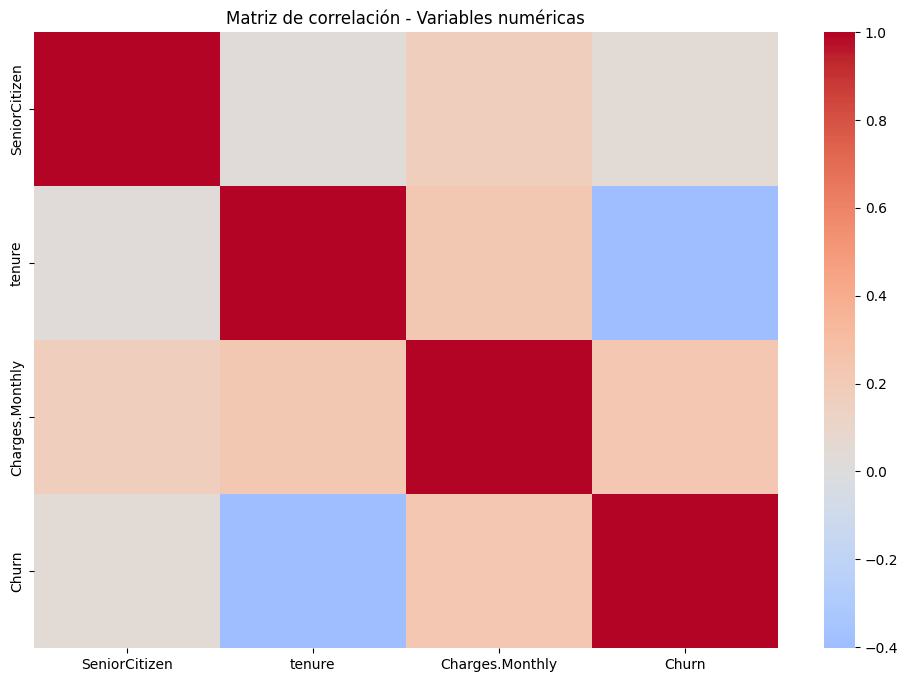

Variables más correlacionadas con la cancelación (Churn):
Churn              1.000000
Charges.Monthly    0.229576
SeniorCitizen      0.041011
tenure            -0.403033
Name: Churn, dtype: float64

Variables menos correlacionadas con la cancelación (Churn):
Churn              1.000000
Charges.Monthly    0.229576
SeniorCitizen      0.041011
tenure            -0.403033
Name: Churn, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usamos el dataset balanceado y numérico (ej: X_smote con y_smote)
# Primero unimos X con la variable objetivo
df_corr = pd.DataFrame(X_smote, columns=X_numeric.columns)
df_corr["Churn"] = y_smote

# Calcular matriz de correlación
corr_matrix = df_corr.corr()

# Visualizar la matriz completa
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de correlación - Variables numéricas")
plt.show()

# 🔎 Mostrar las 10 variables con mayor correlación con Churn
corr_with_churn = corr_matrix["Churn"].sort_values(ascending=False)
print("Variables más correlacionadas con la cancelación (Churn):")
print(corr_with_churn.head(10))
print("\nVariables menos correlacionadas con la cancelación (Churn):")
print(corr_with_churn.tail(10))


In [ ]:
# Mostrar todas las columnas
print(df_clean.columns.tolist())

# Buscar columnas relacionadas con tenure
print([col for col in df_clean.columns if "tenure" in col.lower()])

# Buscar columnas relacionadas con charges o total
print([col for col in df_clean.columns if "charge" in col.lower() or "total" in col.lower()])


['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']
['tenure']
['Charges.Monthly', 'Charges.Total']


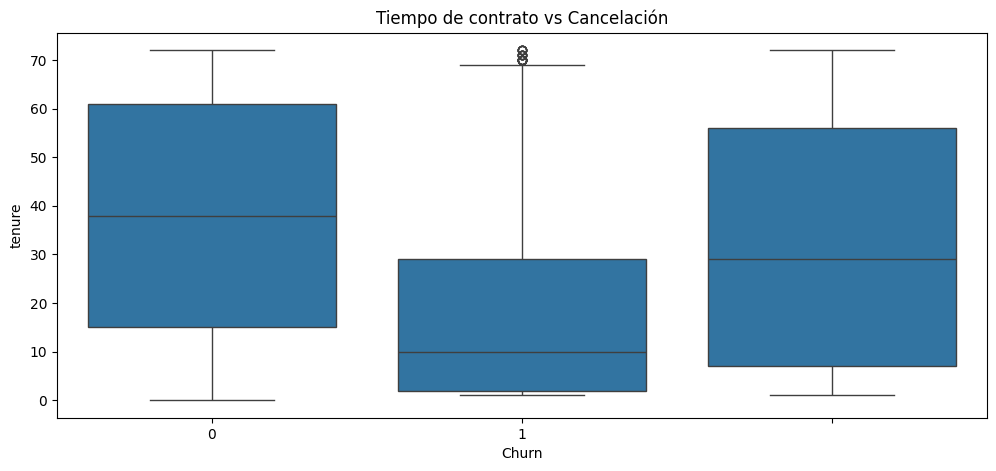

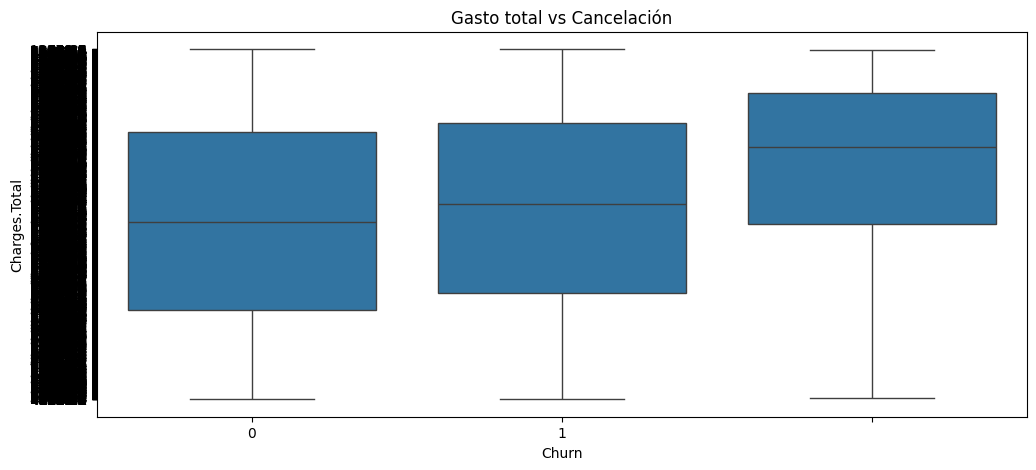

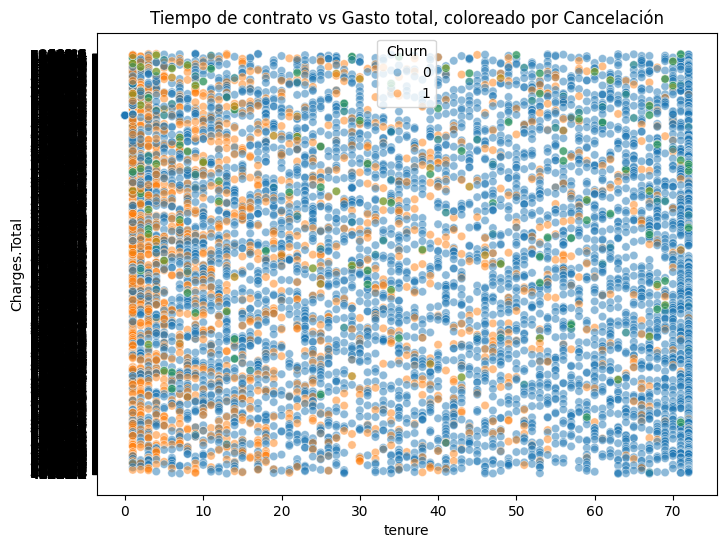

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tiempo de contrato vs Cancelación
plt.figure(figsize=(12,5))
sns.boxplot(x="Churn", y="tenure", data=df_clean)
plt.title("Tiempo de contrato vs Cancelación")
plt.show()

# Gasto total vs Cancelación
plt.figure(figsize=(12,5))
sns.boxplot(x="Churn", y="Charges.Total", data=df_clean)
plt.title("Gasto total vs Cancelación")
plt.show()

# Scatterplot: Tiempo de contrato vs Gasto total
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="tenure",
    y="Charges.Total",
    hue="Churn",
    data=df_clean, alpha=0.5
)
plt.title("Tiempo de contrato vs Gasto total, coloreado por Cancelación")
plt.show()




In [36]:

from sklearn.model_selection import train_test_split

# División 70% entrenamiento - 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (5086, 6561)
Tamaño del conjunto de prueba: (2181, 6561)


In [38]:
# Usar solo columnas numéricas para los modelos
X_numeric = X.select_dtypes(include=["int64", "float64", "uint8", "int32"]).copy()

# Volver a dividir train/test con estas columnas
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.3, random_state=42, stratify=y
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)


Shape X_train: (5086, 3)
Shape X_test: (2181, 3)


In [40]:
# Normalización solo para modelos sensibles a la escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regresión logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


🔹 Modelo 1: Regresión Logística
              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1620
        True       0.65      0.45      0.53       561

    accuracy                           0.80      2181
   macro avg       0.74      0.68      0.70      2181
weighted avg       0.78      0.80      0.78      2181



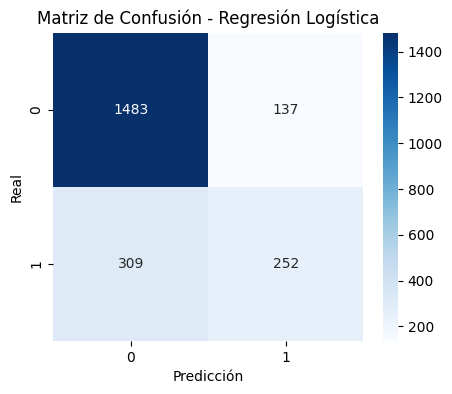

🔹 Modelo 2: Random Forest
              precision    recall  f1-score   support

       False       0.81      0.87      0.84      1620
        True       0.53      0.43      0.47       561

    accuracy                           0.75      2181
   macro avg       0.67      0.65      0.66      2181
weighted avg       0.74      0.75      0.74      2181



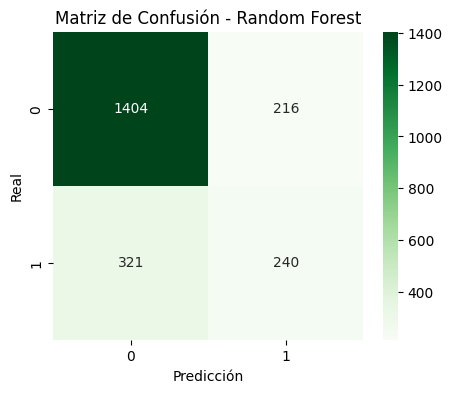

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluación Regresión Logística
print("🔹 Modelo 1: Regresión Logística")
print(classification_report(y_test, y_pred_lr))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Evaluación Random Forest
print("🔹 Modelo 2: Random Forest")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()



🔹 Regresión Logística
Exactitud: 0.796
Precisión: 0.648
Recall: 0.449
F1-score: 0.531

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.83      0.92      0.87      1620
        True       0.65      0.45      0.53       561

    accuracy                           0.80      2181
   macro avg       0.74      0.68      0.70      2181
weighted avg       0.78      0.80      0.78      2181



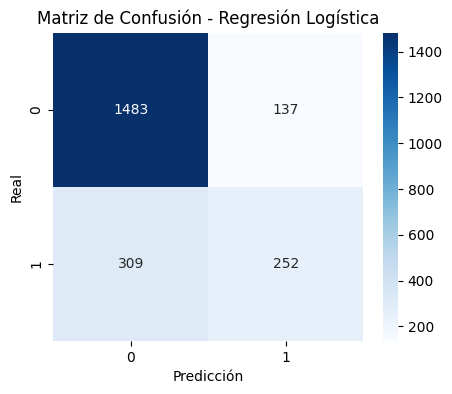


🔹 Random Forest
Exactitud: 0.754
Precisión: 0.526
Recall: 0.428
F1-score: 0.472

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.81      0.87      0.84      1620
        True       0.53      0.43      0.47       561

    accuracy                           0.75      2181
   macro avg       0.67      0.65      0.66      2181
weighted avg       0.74      0.75      0.74      2181



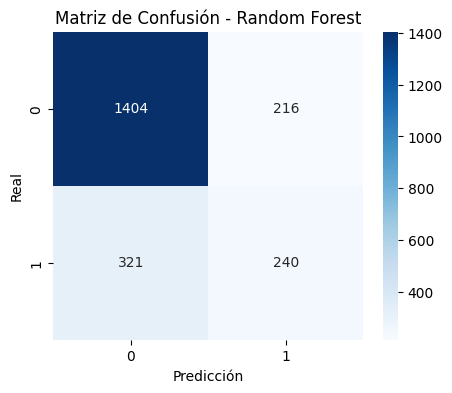

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n🔹 {nombre}")
    print("Exactitud:", round(accuracy_score(y_true, y_pred), 3))
    print("Precisión:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1-score:", round(f1_score(y_true, y_pred), 3))
    print("\nReporte de clasificación:\n", classification_report(y_true, y_pred))

    # Matriz de confusión
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Evaluación de cada modelo
evaluar_modelo("Regresión Logística", y_test, y_pred_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf)


In [50]:
print("Número de columnas en X_train:", len(X_train.columns))
print("Número de coeficientes en log_reg:", len(log_reg.coef_[0]))

Número de columnas en X_train: 6561
Número de coeficientes en log_reg: 3


In [51]:
import pandas as pd
import numpy as np

# Emparejar longitudes automáticamente
coeficientes = pd.DataFrame({
    "Variable": list(X_train.columns)[:len(log_reg.coef_[0])],
    "Coeficiente": log_reg.coef_[0]
})

coeficientes["Importancia"] = np.abs(coeficientes["Coeficiente"])
coeficientes = coeficientes.sort_values(by="Importancia", ascending=False)

print("🔹 Variables más influyentes en Regresión Logística:")
print(coeficientes.head(10))


🔹 Variables más influyentes en Regresión Logística:
        Variable  Coeficiente  Importancia
1  SeniorCitizen    -1.296722     1.296722
2         tenure     0.940496     0.940496
0     customerID     0.231555     0.231555


In [53]:
print("Número de columnas en X_train:", len(X_train.columns))
print("Número de importancias en Random Forest:", len(rf.feature_importances_))


Número de columnas en X_train: 6561
Número de importancias en Random Forest: 3


In [54]:
importancias = pd.DataFrame({
    "Variable": list(X_train.columns)[:len(rf.feature_importances_)],
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("🔹 Variables más influyentes en Random Forest:")
print(importancias.head(10))


🔹 Variables más influyentes en Random Forest:
        Variable  Importancia
2         tenure     0.640985
1  SeniorCitizen     0.338241
0     customerID     0.020774


/tmp/ipython-input-3074378614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=importancias.head(10), palette="viridis")


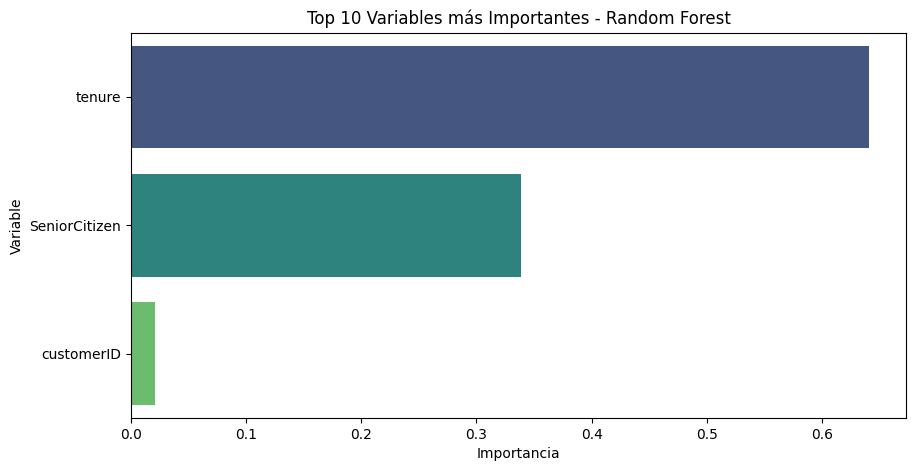

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x="Importancia", y="Variable", data=importancias.head(10), palette="viridis")
plt.title("Top 10 Variables más Importantes - Random Forest")
plt.show()


In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamos un modelo KNN (ejemplo con k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predicciones (para después evaluar)
y_pred_knn = knn_model.predict(X_test_scaled)


In [59]:
n_features = len(result.importances_mean)

perm_importances = pd.DataFrame({
    "Variable": list(X_train.columns)[:n_features],
    "Importancia": result.importances_mean
}).sort_values(by="Importancia", ascending=False)

print("🔹 Variables más influyentes en KNN (Permutation Importance):")
print(perm_importances.head(10))


🔹 Variables más influyentes en KNN (Permutation Importance):
        Variable  Importancia
1  SeniorCitizen     0.116506
2         tenure     0.056121
0     customerID     0.003622


/tmp/ipython-input-2364045171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=perm_importances.head(10), palette="mako")


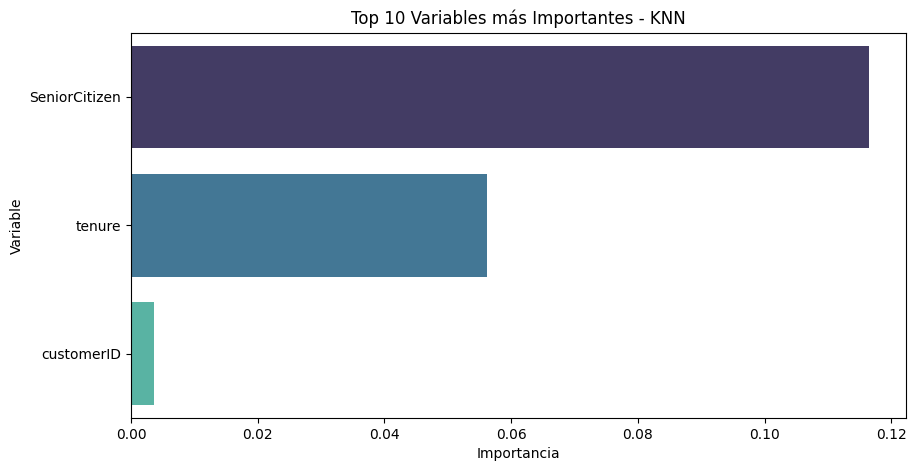

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x="Importancia", y="Variable", data=perm_importances.head(10), palette="mako")
plt.title("Top 10 Variables más Importantes - KNN")
plt.show()


In [62]:
print("Número de columnas en X_train:", len(X_train.columns))
print("Número de coeficientes en SVM:", len(svm_model.coef_[0]))


Número de columnas en X_train: 6561
Número de coeficientes en SVM: 3


In [63]:
n_features = len(svm_model.coef_[0])

coef_svm = pd.DataFrame({
    "Variable": list(X_train.columns)[:n_features],
    "Coeficiente": svm_model.coef_[0]
})

coef_svm["Importancia"] = coef_svm["Coeficiente"].abs()
coef_svm = coef_svm.sort_values(by="Importancia", ascending=False)

print("🔹 Variables más influyentes en SVM:")
print(coef_svm.head(10))


🔹 Variables más influyentes en SVM:
        Variable  Coeficiente  Importancia
1  SeniorCitizen    -0.444887     0.444887
2         tenure     0.329761     0.329761
0     customerID     0.088217     0.088217


/tmp/ipython-input-1178516699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=coef_svm.head(10), palette="rocket")


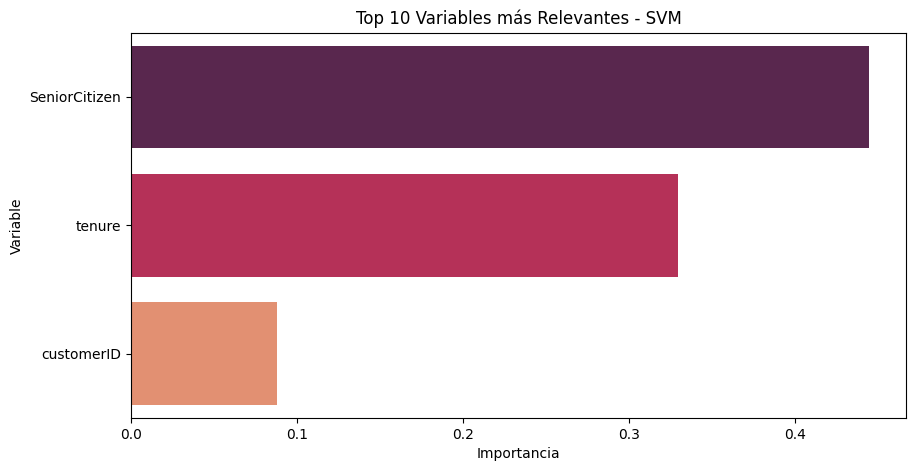

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x="Importancia", y="Variable", data=coef_svm.head(10), palette="rocket")
plt.title("Top 10 Variables más Relevantes - SVM")
plt.show()
